In [8]:
import pandas as pd
import seaborn as sns
import numpy as np

In [9]:
df = pd.read_csv('/content/Churn_Modelling.csv')
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [10]:
df.shape

(10000, 14)

In [11]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [12]:
x = df[['CreditScore','Age','Tenure','Balance','NumOfProducts','HasCrCard','IsActiveMember','EstimatedSalary']]
y = df['Exited']

In [13]:
x

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,42,2,0.00,1,1,1,101348.88
1,608,41,1,83807.86,1,0,1,112542.58
2,502,42,8,159660.80,3,1,0,113931.57
3,699,39,1,0.00,2,0,0,93826.63
4,850,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64
9996,516,35,10,57369.61,1,1,1,101699.77
9997,709,36,7,0.00,1,0,1,42085.58
9998,772,42,3,75075.31,2,1,0,92888.52


In [14]:
y

,Exited
0,1
1,0
2,1
3,0
4,0
...,...
9995,0
9996,0
9997,1
9998,1


<Axes: xlabel='Exited', ylabel='count'>

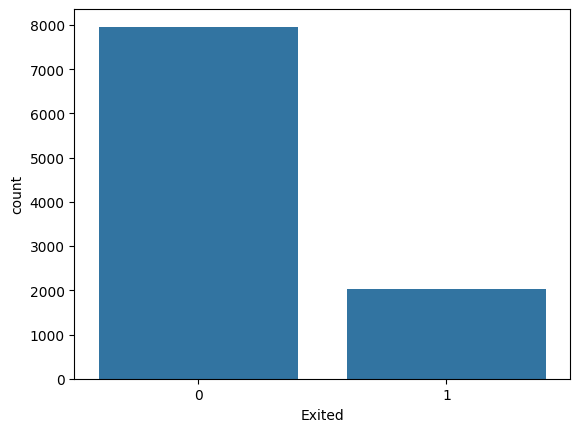

In [15]:
sns.countplot(x=y)

In [16]:
y.value_counts()

,count
Exited,
0,7963
1,2037


In [17]:
#Normalize
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
x_scaled

array([[-0.32622142,  0.29351742, -1.04175968, ...,  0.64609167,
         0.97024255,  0.02188649],
       [-0.44003595,  0.19816383, -1.38753759, ..., -1.54776799,
         0.97024255,  0.21653375],
       [-1.53679418,  0.29351742,  1.03290776, ...,  0.64609167,
        -1.03067011,  0.2406869 ],
       ...,
       [ 0.60498839, -0.27860412,  0.68712986, ..., -1.54776799,
         0.97024255, -1.00864308],
       [ 1.25683526,  0.29351742, -0.69598177, ...,  0.64609167,
        -1.03067011, -0.12523071],
       [ 1.46377078, -1.04143285, -0.35020386, ...,  0.64609167,
        -1.03067011, -1.07636976]])

In [18]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=0)

In [19]:
from sklearn.neural_network import MLPClassifier

In [20]:
ann = MLPClassifier(hidden_layer_sizes=(100,100,100),
                    random_state=0,
                    max_iter=100,
                    activation='relu')

In [21]:
ann.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(100, 100, 100), max_iter=100, random_state=0)

In [22]:
y_pred = ann.predict(x_test)

In [23]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score,ConfusionMatrixDisplay

In [24]:
accuracy_score(y_test,y_pred)

0.8275

In [25]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.91      0.89      1595
           1       0.59      0.50      0.54       405

    accuracy                           0.83      2000
   macro avg       0.73      0.70      0.72      2000
weighted avg       0.82      0.83      0.82      2000



In [26]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[1453,  142],
       [ 203,  202]])

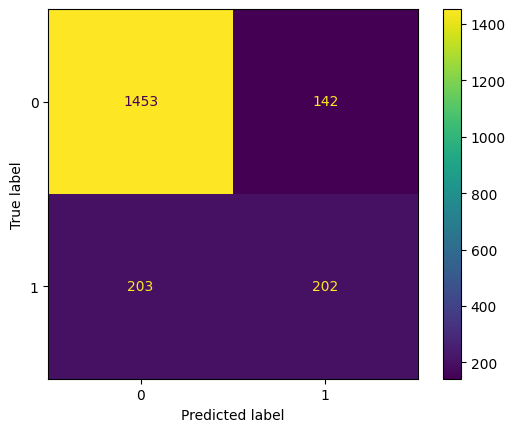

In [27]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

# Explanation of the Neural Network Code Using MLPClassifier

This markdown provides a detailed explanation of the steps involved in building, training, and evaluating a neural network model using the `MLPClassifier` from the `sklearn.neural_network` module.

## 1. Importing the MLPClassifier
```python
from sklearn.neural_network import MLPClassifier
Theory:
The MLPClassifier is part of sklearn.neural_network. It implements a Multi-Layer Perceptron (MLP), a type of artificial neural network. MLP is commonly used for supervised learning tasks like classification. It is a fully connected feed-forward neural network with one or more hidden layers between the input and output layers.

2. Initializing the Neural Network Model
python
Copy code
ann = MLPClassifier(hidden_layer_sizes=(100, 100, 100),
                    random_state=0,
                    max_iter=100,
                    activation='relu')
Theory:

hidden_layer_sizes=(100, 100, 100): Defines the architecture of the neural network. The tuple (100, 100, 100) means the network will have 3 hidden layers, each with 100 neurons. The number of neurons in each hidden layer can significantly affect the model's performance.
random_state=0: Ensures reproducibility by fixing the random seed for generating random numbers. This means the results will be the same each time the code is run.
max_iter=100: Specifies the maximum number of iterations (epochs) the training process will run. During each iteration, the model adjusts its parameters to minimize the loss function.
activation='relu': Defines the activation function used in the hidden layers. ReLU (Rectified Linear Unit) is the most common activation function as it helps prevent the vanishing gradient problem and improves training speed. It returns the input value if positive and zero otherwise.
3. Training the Neural Network
python
Copy code
ann.fit(x_train, y_train)
Theory:
The fit() method trains the MLP model using the training data (x_train) and corresponding labels (y_train). During this step, the model learns the relationship between the features and the target by adjusting the weights in the network. This process uses backpropagation and the gradient descent optimization method. In each epoch, the model calculates the error (loss) for each prediction, computes gradients, and updates the weights accordingly to reduce the error.

Epochs:
The model performs these steps for a fixed number of iterations (epochs), adjusting its weights to improve its accuracy.

4. Making Predictions
python
Copy code
y_pred = ann.predict(x_test)
Theory:
After the model is trained, the predict() method is used to make predictions on the test data (x_test). The trained neural network applies the learned weights to the features in x_test to generate predicted values (y_pred). The model does not adjust its weights during this phase as it is now in the inference phase.

5. Importing Evaluation Metrics
python
Copy code
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, ConfusionMatrixDisplay
Theory:
These evaluation metrics are used to assess the performance of the trained model:

accuracy_score: Measures how many predictions were correct out of the total predictions.
classification_report: Provides a detailed report that includes precision, recall, F1-score, and support (number of samples) for each class.
confusion_matrix: Computes a matrix showing the true positives, true negatives, false positives, and false negatives for classification tasks.
ConfusionMatrixDisplay: A function to display the confusion matrix visually.
6. Calculating Accuracy
python
Copy code
accuracy_score(y_test, y_pred)
Theory:
The accuracy_score() function calculates the proportion of correct predictions. It is computed as:

Accuracy
=
Number of Correct Predictions
Total Number of Predictions
Accuracy=
Total Number of Predictions
Number of Correct Predictions
​

Note: Accuracy is a basic evaluation metric but may not be sufficient for imbalanced datasets, where one class may be underrepresented.

7. Generating the Classification Report
python
Copy code
print(classification_report(y_test, y_pred))
Theory:
The classification_report() provides a comprehensive view of the model’s performance, including:

Precision: The proportion of positive predictions that are actually correct. It is defined as:
Precision
=
True Positives
True Positives
+
False Positives
Precision=
True Positives+False Positives
True Positives
​

Recall: The proportion of actual positives that are correctly predicted. It is defined as:
Recall
=
True Positives
True Positives
+
False Negatives
Recall=
True Positives+False Negatives
True Positives
​

F1-score: The harmonic mean of precision and recall. It is useful when dealing with imbalanced classes, as it balances both precision and recall into one metric:
𝐹
1
=
2
×
Precision
×
Recall
Precision
+
Recall
F1=2×
Precision+Recall
Precision×Recall
​

Support: The number of true occurrences of each class in the dataset.
8. Generating the Confusion Matrix
python
Copy code
cm = confusion_matrix(y_test, y_pred)
cm
Theory:
The confusion_matrix() function computes the matrix that shows the number of correct and incorrect predictions broken down by class. It provides:

True Positives (TP): Correctly predicted positive class labels.
True Negatives (TN): Correctly predicted negative class labels.
False Positives (FP): Incorrectly predicted positive class labels (Type I error).
False Negatives (FN): Incorrectly predicted negative class labels (Type II error).
The confusion matrix is useful for assessing the types of errors the model is making.

9. Visualizing the Confusion Matrix
python
Copy code
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
Theory:
The ConfusionMatrixDisplay.from_predictions() function is used to display the confusion matrix visually. This helps in quickly understanding how well the model is classifying the data and identifying where it is making errors (which classes are being confused with each other). It can also show additional information, such as normalized values (percentages).

Summary of Neural Network Model:
MLPClassifier: A neural network model used for classification. It consists of layers of neurons that are fully connected. The model was trained using the ReLU activation function, and the training process involved backpropagation and optimization with gradient descent.
Training: The model learned patterns from the training data, adjusting its internal weights during the training phase.
Evaluation: After training, the model's predictions were compared to actual labels using metrics like accuracy, precision, recall, F1-score, and confusion matrix. These metrics provide insights into how well the model performed and whether it is generalizing well to unseen data.